In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
#importing the CSV file
df=pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
#shape of the data
df.shape
#rows=13320   columns=9

(13320, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
for i in df:
    print(df[i].value_counts())

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          

In [7]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
df.corr(numeric_only=True)

,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


In [9]:
df.drop(columns=["area_type","availability","society","balcony"],inplace=True)

In [10]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [12]:
df.location.value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [13]:
df["location"]=df["location"].fillna("Whitefield")

In [14]:
df.isnull().sum()

location       0
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [15]:
df.bath.value_counts().sum()

13247

In [16]:
df["bath"]=df["bath"].fillna(df["bath"].median())

In [17]:
df["size"]=df['size'].fillna("2 BHK")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [21]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [22]:
df["BHK"]=df["size"].str.split().str.get(0).astype(int)

In [27]:
df.head()

,location,size,total_sqft,bath,price,BHK,Price_Per_Squareft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [24]:
def convertRange(x):
    temp=x.split('-')
    if len(temp)==2:
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [25]:
df["total_sqft"]=df["total_sqft"].apply(convertRange)

In [26]:
df["Price_Per_Squareft"]=(df['price']*100000)/df["total_sqft"]

In [28]:
df.describe()

,total_sqft,bath,price,BHK,Price_Per_Squareft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [31]:
df.corr(numeric_only=True)

,total_sqft,bath,price,BHK,Price_Per_Squareft
total_sqft,1.000000,0.389223,0.575559,0.347455,-0.008251
bath,0.389223,1.000000,0.454449,0.895786,0.030923
price,0.575559,0.454449,1.000000,0.398074,0.028406
BHK,0.347455,0.895786,0.398074,1.000000,0.030928
Price_Per_Squareft,-0.008251,0.030923,0.028406,0.030928,1.000000


In [48]:
df.location.value_counts()

location
other                  2755
Whitefield              542
Sarjapur  Road          399
Electronic City         304
Kanakpura Road          273
                       ... 
BTM 1st Stage            10
Basapura                 10
Sector 1 HSR Layout      10
Kalkere                  10
Nagadevanahalli          10
Name: count, Length: 255, dtype: int64

In [42]:
df["location"]=df["location"].apply(lambda x: x.strip())
location_counts=df["location"].value_counts()

In [43]:
location_count_less10=location_counts[location_counts<10]

In [44]:
location_count_less10

location
Vishwanatha Nagenahalli           9
Chennammana Kere                  9
2nd Phase JP Nagar                9
Jakkur Plantation                 9
B Narayanapura                    9
                                 ..
Bapuji Layout                     1
1st Stage Radha Krishna Layout    1
BEML Layout 5th stage             1
singapura paradise                1
Abshot Layout                     1
Name: count, Length: 1040, dtype: int64

In [49]:
df["location"]=df["location"].apply(lambda x: "other" if x in location_count_less10 else x)

In [52]:
df["location"].value_counts()

location
other                  2755
Whitefield              542
Sarjapur  Road          399
Electronic City         304
Kanakpura Road          273
                       ... 
BTM 1st Stage            10
Basapura                 10
Sector 1 HSR Layout      10
Kalkere                  10
Nagadevanahalli          10
Name: count, Length: 255, dtype: int64

In [56]:
df.describe()

,total_sqft,bath,price,BHK,Price_Per_Squareft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [55]:
df=df[((df['total_sqft'])/(df['BHK']))>=300]

In [58]:
df.shape

(12530, 7)

In [60]:
percentile_25=df['Price_Per_Squareft'].quantile(0.25)
percentile_75=df['Price_Per_Squareft'].quantile(0.75)

In [61]:
iqr=percentile_75-percentile_25

In [62]:
iqr

2706.1403508771937

<Axes: >

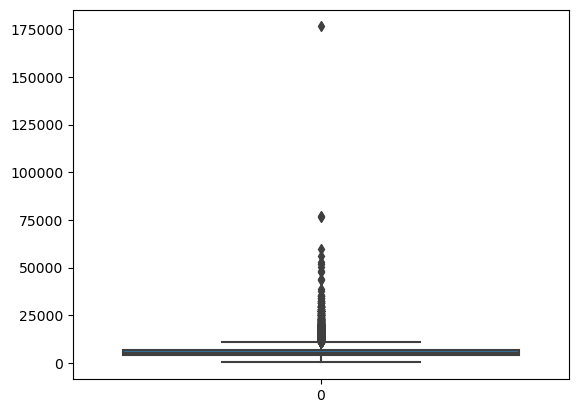

In [65]:

sns.boxplot(df['Price_Per_Squareft'])

In [66]:
df2=df[((df['total_sqft'])/(df['BHK']))>=300]

In [67]:
upper_limit=percentile_75+iqr*1.5
lower_limit=percentile_25-iqr*1.5

In [68]:
upper_limit

10975.877192982458

In [69]:
lower_limit

151.3157894736828

In [77]:
upper_data_points=df[df['Price_Per_Squareft']>upper_limit]
lower_data_points=df[df['Price_Per_Squareft']<lower_limit]

In [74]:
upper_data_points.shape

(1007, 7)

In [78]:
lower_data_points.shape

(0, 7)

In [80]:
df2=df2[(df2['Price_Per_Squareft']<upper_limit) & (df2['Price_Per_Squareft']>lower_limit)]

In [82]:
df2.shape

(11523, 7)

In [83]:
df2.drop(columns=['size','Price_Per_Squareft'],inplace=True)

In [84]:
df2

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,112.00,3
13315,Whitefield,3453.0,4.0,231.00,5
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,488.00,4


In [102]:
x=df2.drop(columns="price")

In [103]:
y=df2["price"]

In [104]:
x

,location,total_sqft,bath,BHK
0,Electronic City Phase II,1056.0,2.0,2
1,Chikka Tirupathi,2600.0,5.0,4
2,Uttarahalli,1440.0,2.0,3
3,Lingadheeranahalli,1521.0,3.0,3
4,Kothanur,1200.0,2.0,2
...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3
13315,Whitefield,3453.0,4.0,5
13317,Raja Rajeshwari Nagar,1141.0,2.0,2
13318,Padmanabhanagar,4689.0,4.0,4


In [105]:
y

0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13314    112.00
13315    231.00
13317     60.00
13318    488.00
13319     17.00
Name: price, Length: 11523, dtype: float64

In [106]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import r2_score

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [108]:
print(x_train.shape)
print(x_test.shape)

(9218, 4)
(2305, 4)


In [109]:
column_transform=make_column_transformer((OneHotEncoder(sparse=False),['location']),remainder='passthrough')

In [110]:
scaler= StandardScaler()

#linear Regression

In [112]:
lr=LinearRegression()

In [129]:
pipe= make_pipeline(column_transform,scaler,lr)

In [114]:
pipe.fit(x_train,y_train)

C:\Users\Prashant rohera\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [115]:
y_pred_lr=pipe.predict(x_test)

In [117]:
r2_score(y_test,y_pred_lr)

0.6645484508263599

In [134]:
mean_squared_error(y_test,y_pred_lr)

1898.4585447939419

#lasso regression

In [119]:
lasso=Lasso()

In [121]:
pipe2= make_pipeline(column_transform,scaler,lasso)

In [123]:
pipe2.fit(x_train,y_train)

C:\Users\Prashant rohera\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [124]:
y_pred_lasso=pipe2.predict(x_test)

In [125]:
r2_score(y_test,y_pred_lasso)

0.6486715624678085

In [135]:
mean_squared_error(y_test,y_pred_lasso)

1988.3123983333958

#Ridge Regression

In [126]:
ridge= Ridge()

In [128]:
pipe3= make_pipeline(column_transform,scaler,ridge)

In [130]:
pipe3.fit(x_train,y_train)

C:\Users\Prashant rohera\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [137]:
y_pred_ridge=pipe3.predict(x_test)

In [138]:
r2_score(y_test,y_pred_ridge)

0.6651898302876951

In [139]:
mean_squared_error(y_test,y_pred_ridge)

1894.828714131879

In [ ]:
#Decision Tree

In [140]:
d_tree=DecisionTreeRegressor()

In [141]:
pipe4= make_pipeline(column_transform,scaler,d_tree)

In [142]:
pipe4.fit(x_train,y_train)

C:\Users\Prashant rohera\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [143]:
y_pred_D_tree=pipe4.predict(x_test)

In [144]:
r2_score(y_test,y_pred_D_tree)

0.7631755226671625

In [145]:
mean_squared_error(y_test,y_pred_D_tree)

1340.2873044302353

In [ ]:
#Randon Forest

In [147]:
rfr=RandomForestRegressor()

In [148]:
pipe5= make_pipeline(column_transform,scaler,rfr)

In [149]:
pipe5.fit(x_train,y_train)

C:\Users\Prashant rohera\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [152]:
y_pred_Rf=pipe5.predict(x_test)

In [153]:
r2_score(y_test,y_pred_Rf)

0.8247500188383426

In [155]:
mean_squared_error(y_test,y_pred_Rf)

991.8118578701435

In [ ]:
#KNeighborsRegressor

In [161]:
kn=KNeighborsRegressor()

In [162]:
pipe6= make_pipeline(column_transform,scaler,kn)

In [166]:
pipe6.fit(x_train,y_train)

C:\Users\Prashant rohera\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [167]:
y_pred_kn=pipe6.predict(x_test)

In [169]:
r2_score(y_test,y_pred_kn)

0.6645254706366921